# Kaggle House Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
from scipy.stats import kurtosis, skew
from scipy import stats

%matplotlib inline
warnings.filterwarnings(action='once')

Load csv data files :

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

View dimensions :

In [3]:
print("train : " + str(train.shape))
print("test : " + str(test.shape))

train : (1460, 81)
test : (1459, 80)


Columns name :

In [4]:
list(train)

Examine first few rows of data :

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Calculate summary statistics :

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Analyze target output train['SalePrice'] :

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

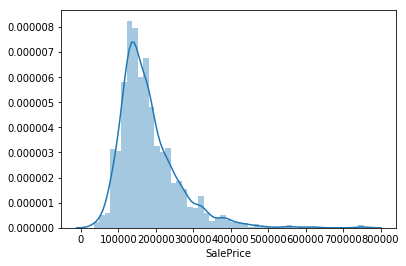

In [9]:
sns.distplot(train['SalePrice'])

In [10]:
train['SalePrice'] = np.log(train['SalePrice'])

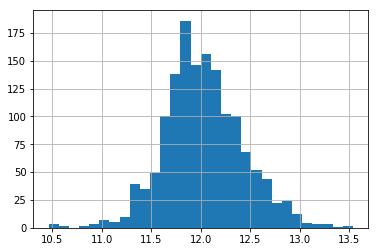

In [11]:
train['SalePrice'].hist(bins=30)

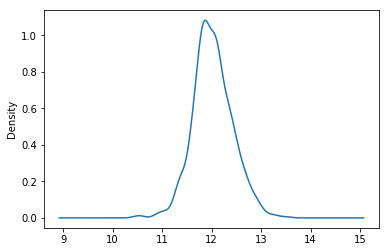

In [12]:
train['SalePrice'].plot.kde()

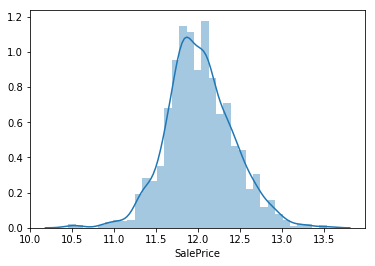

In [13]:
sns.distplot(train['SalePrice'])

Variables quantitatives :

In [14]:
train_quanti_names = train.select_dtypes(include=np.number).columns
train_quanti_names

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
test_quanti_names = test.select_dtypes(include=np.number).columns
test_quanti_names

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [16]:
train_quanti_num = len(train_quanti_names)
print("Le nombre de variables quantitatives est de:", train_quanti_num)

Le nombre de variables quantitatives est de: 38


In [17]:
test_quanti_num = len(test_quanti_names)
print("Le nombre de variables quantitatives est de:", test_quanti_num)

Le nombre de variables quantitatives est de: 37


Variables qualitatives :

In [18]:
train_quali_names = train.select_dtypes(include=np.object).columns
train_quali_names

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
test_quali_names = test.select_dtypes(include=np.object).columns
test_quali_names

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
train_quali_num = len(train_quali_names)
print("Le nombre de variables qualitatives est de:", train_quali_num)

Le nombre de variables qualitatives est de: 43


In [21]:
test_quali_num = len(test_quali_names)
print("Le nombre de variables qualitatives est de:", test_quali_num)

Le nombre de variables qualitatives est de: 43


Correlation Matrix :

In [22]:
corr_mat = train.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023


Most important features
SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch 

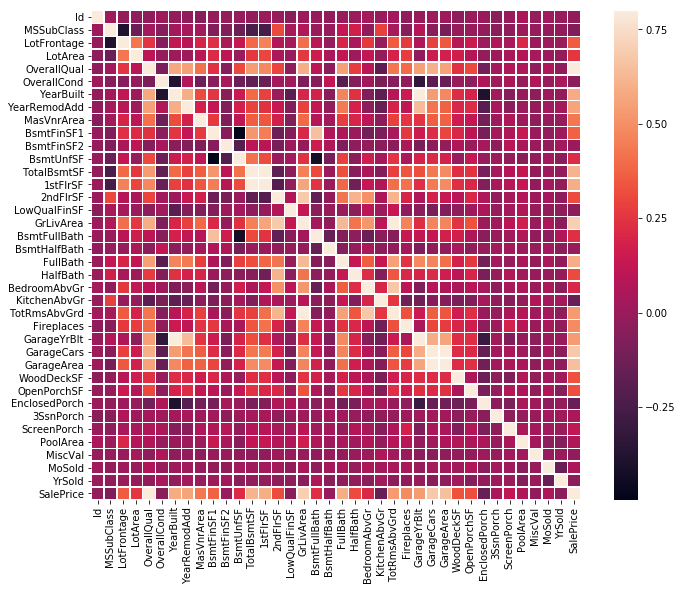

In [23]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, linewidths=.5,);
print("Most important features")
corr_mat.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr_mat.SalePrice)

In [24]:
# Autre méthode pour avoir le top 10 des features corr_mat
k = 11
cols = corr_mat.nlargest(k,'SalePrice').index
cols 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')

In [25]:
corr_mat_10 = train[cols].corr()
corr_mat_10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,1.000000,0.817184,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608,0.541073
OverallQual,0.817184,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.547766
GrLivArea,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389,0.231197
GarageCars,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.588920
GarageArea,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.564567
TotalBsmtSF,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.322445
1stFlrSF,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.233449
FullBath,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.484557
YearBuilt,0.586570,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.825667
YearRemodAdd,0.565608,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.642277


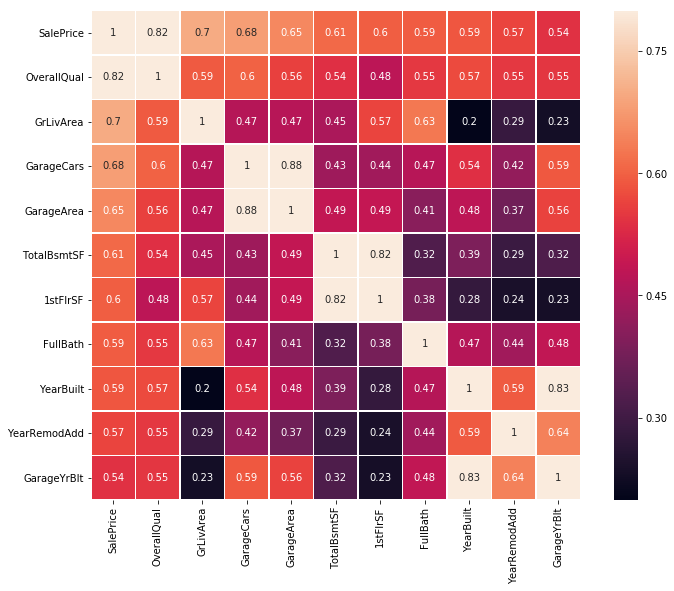

In [26]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat_10, vmax=.8, annot = True, square=True, linewidths=.5,);

Outliers des top 10 des features corr_mat :

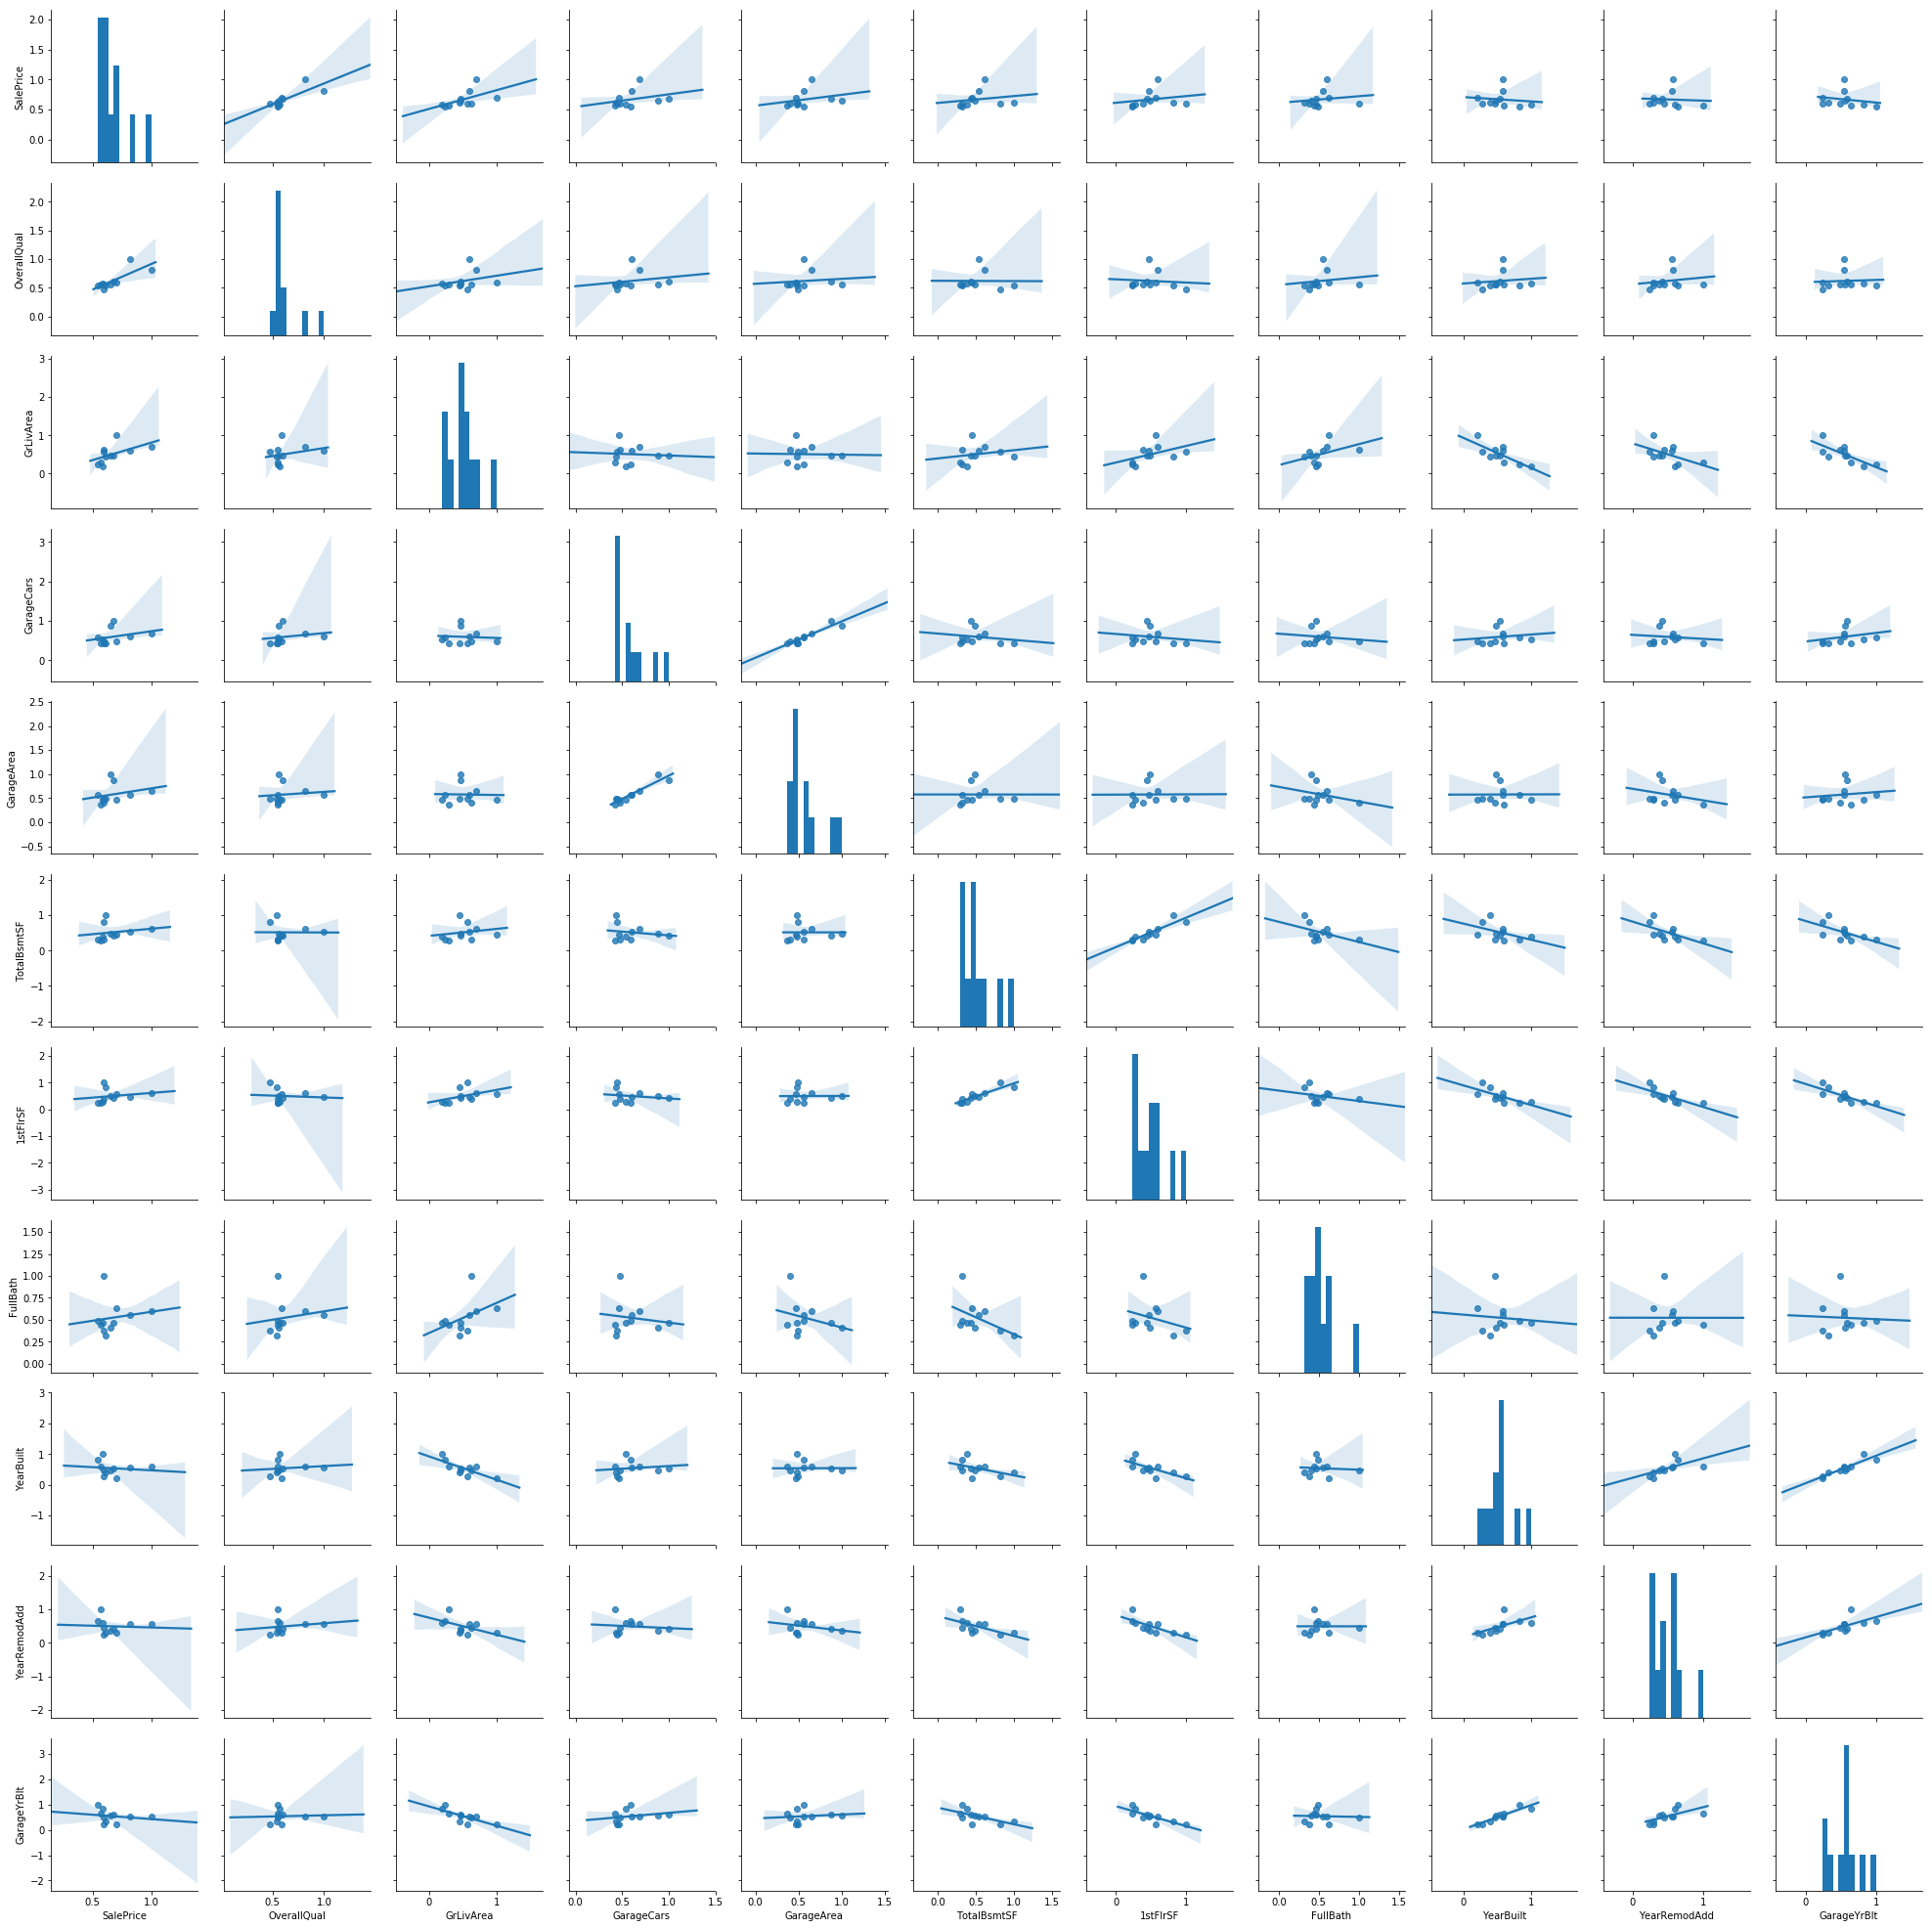

In [27]:
sns.pairplot(corr_mat_10, kind="reg")
plt.show()

c:\users\utilisateur\python\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


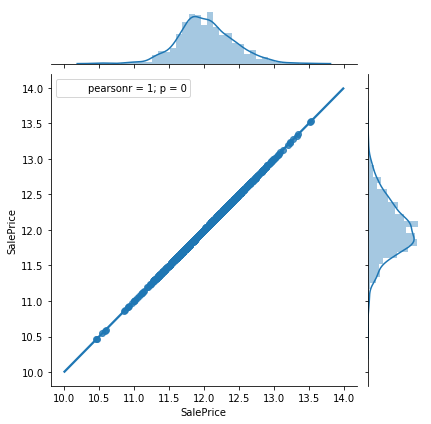

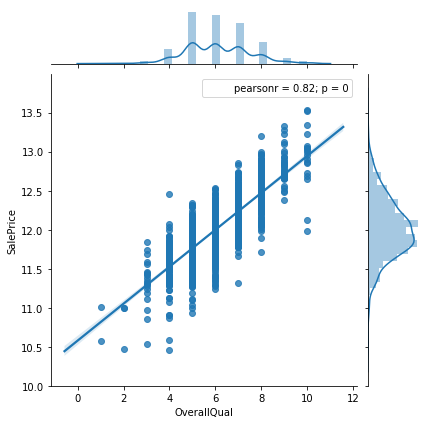

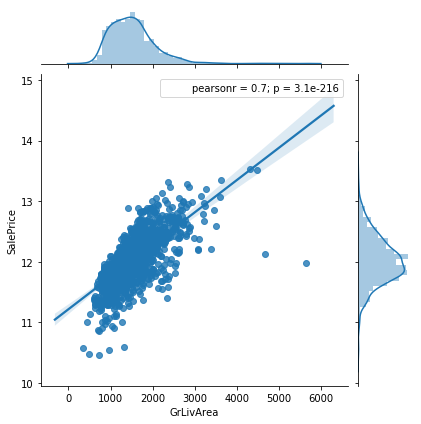

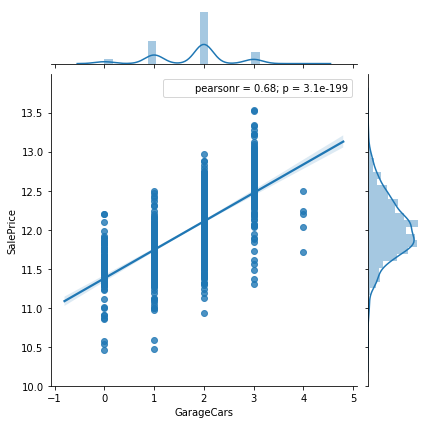

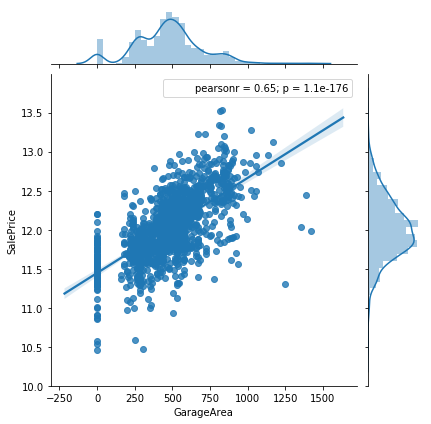

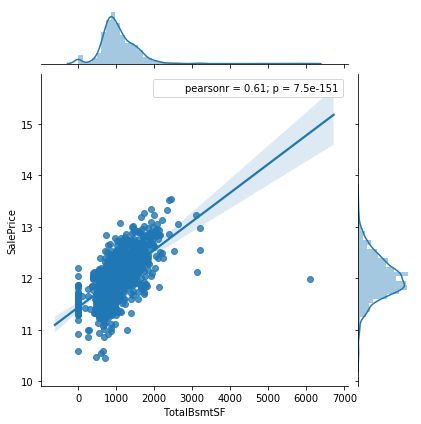

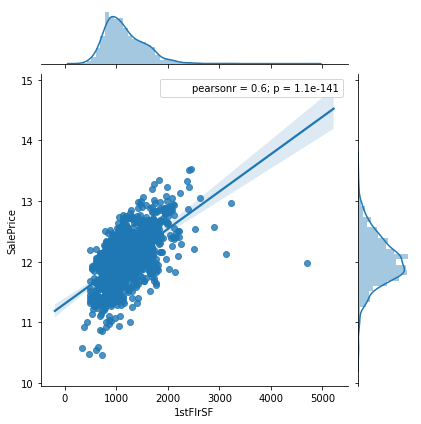

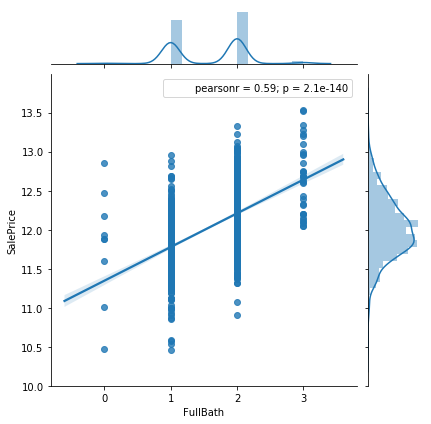

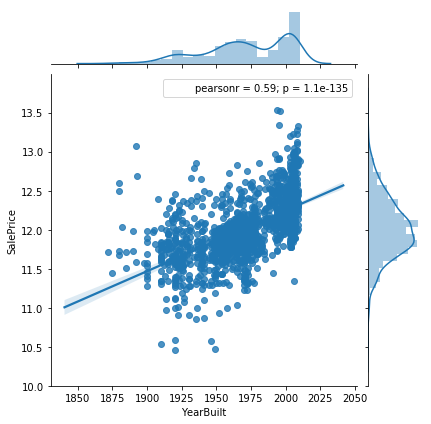

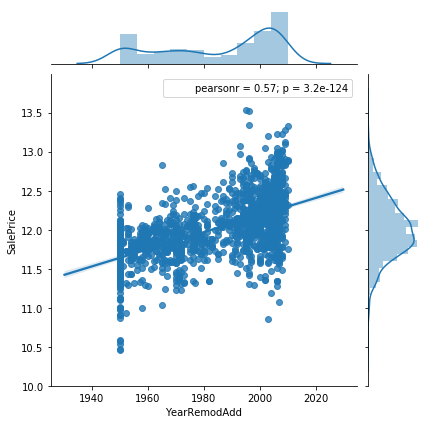

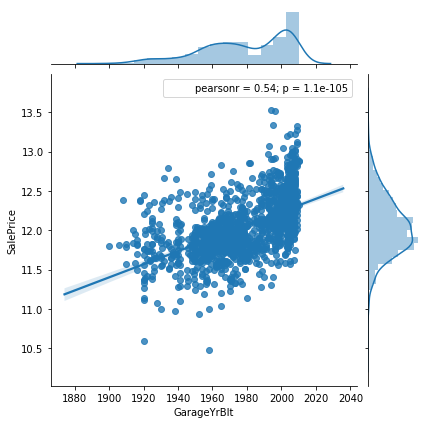

In [28]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

for feature in corr_mat_10:
    sns.jointplot(x=feature,y='SalePrice', data=train, kind="reg").annotate(pearsonr)
    plt.show()

Analyse :
- OverallQual : RAS
- GrLivArea : On peut voir qu'il y a 2 outliers. Deux grandes maisons vendues à bas prix.
- GarageCars : On peut voir que le prix augmente avec le nombre de place de voiture. Plus le garage peut stocker de voiture, plus le prix augmente. Or à partir de 4 voitures le prix est bas.
- GarageArea : Même observation pour le Garagecars, plus la surface est grande et plus le prix augmente. Or à partir de 1200(unité de mesure) on peut voir que le prix n'est pas élévé. (Ici, on peut également se poser la question de la redondance d'information avec GarageCars).
- TotalBsmtSF : Pareil que GarageArea. On peut noter un outlier à partir de 6000(unité de mesure).
- 1stFlrSF : Pareil que TotalBsmtSF 5peut-être aussi une redondance ?)
- YearBuilt : RAS
- YearRemodAdd : RAS
- GarageYrBlt : RAS
- TotRmsAbvGrd : RAS

Delete outliers :

- GrLivArea :

In [29]:
train.nlargest(4,'GrLivArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982929
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126759
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521139
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534473


In [30]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 12.5)].index).reset_index(drop=True)

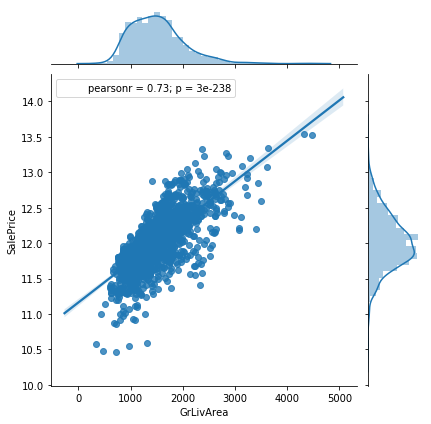

In [31]:
sns.jointplot(x='GrLivArea',y='SalePrice', data=train, kind="reg").annotate(pearsonr)

- GarageCars :

In [32]:
train.nlargest(4,'GrLivArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1181,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521139
690,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534473
1168,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,13.345507
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,13.071070


In [33]:
train = train.drop(train[(train['GarageCars'] > 3) & (train['SalePrice'] <12.5)].index).reset_index(drop=True)

- GarageArea : 

In [34]:
train.nlargest(4,'GarageArea')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
579,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,12.442302
1058,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,11.302204
822,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,12.860999
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,13.126031


In [35]:
train = train.drop(train[(train['GarageArea'] > 1250) & (train['SalePrice'] <12.5)].index).reset_index(drop=True)

- TotalBsmtSF :

In [36]:
train.nlargest(1,'TotalBsmtSF')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,12.55673


In [37]:
train = train.drop(train[(train['TotalBsmtSF'] > 6000) & (train['SalePrice'] <12.6)].index).reset_index(drop=True)

- 1stFlrSF : 

In [38]:
train.nlargest(1,'1stFlrSF')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.97154


In [39]:
train = train.drop(train[(train['1stFlrSF'] > 4000) & (train['SalePrice'] <13)].index).reset_index(drop=True)

Vérification que les outliers ont bien été supprimés :

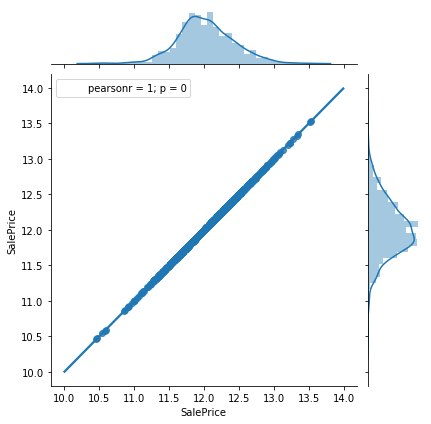

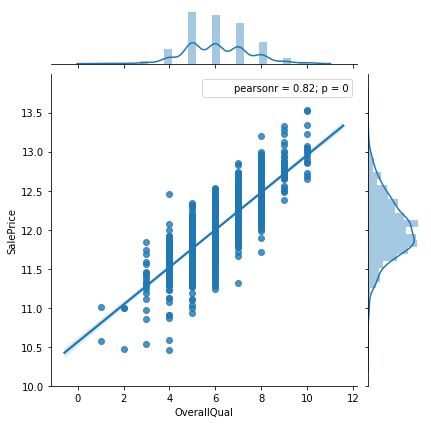

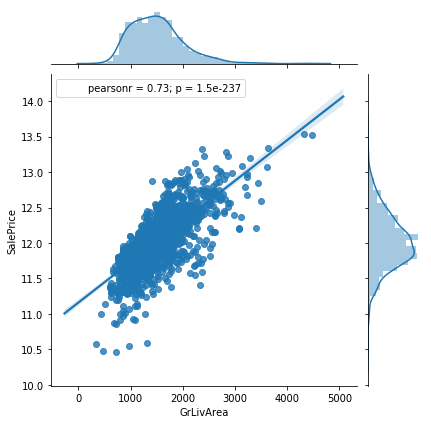

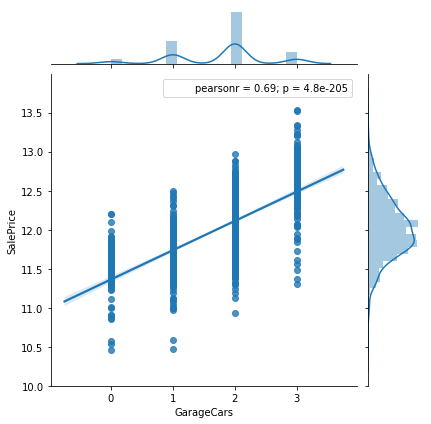

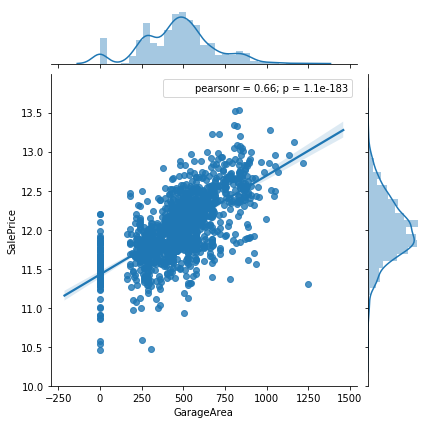

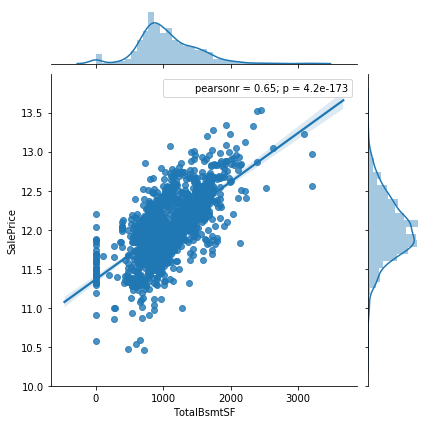

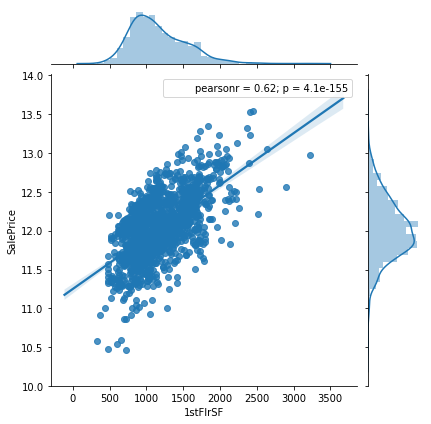

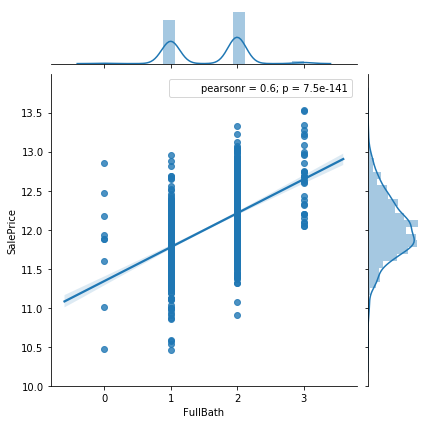

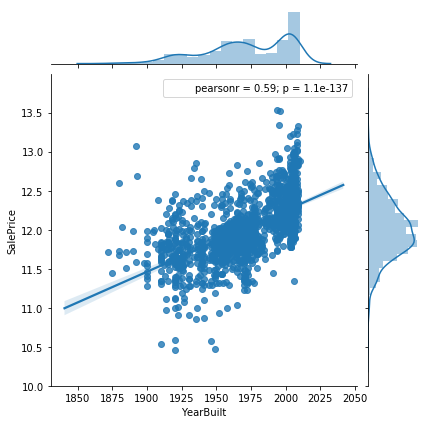

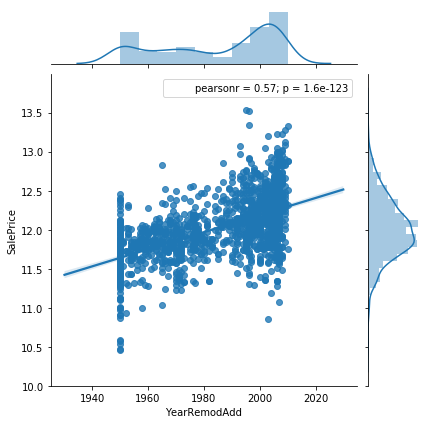

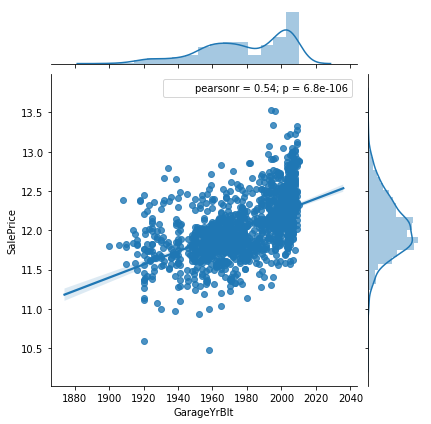

In [40]:
for feature in corr_mat_10:
    sns.jointplot(x=feature,y='SalePrice', data=train, kind="reg").annotate(pearsonr)
    plt.show()

Analyse : La corrélation augmente une fois les outliers supprimés

## Check for NA

NA values in each column :

In [41]:
na = train.isna().sum().sort_values(ascending=False)
na = na[na > 0]
pd.set_option('display.max_rows', na.shape[0]+1)
# train.isna().sum().sort_values(ascending=False)
print(na)

PoolQC          1446
MiscFeature     1398
Alley           1362
Fence           1172
FireplaceQu      687
LotFrontage      258
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [42]:
nan = train.isnull().mean() * 100
nan = nan[nan > 0]
nan.sort_values(ascending=False)

PoolQC          99.586777
MiscFeature     96.280992
Alley           93.801653
Fence           80.716253
FireplaceQu     47.314050
LotFrontage     17.768595
GarageYrBlt      5.578512
GarageType       5.578512
GarageFinish     5.578512
GarageQual       5.578512
GarageCond       5.578512
BsmtFinType2     2.617080
BsmtExposure     2.617080
BsmtFinType1     2.548209
BsmtCond         2.548209
BsmtQual         2.548209
MasVnrArea       0.550964
MasVnrType       0.550964
Electrical       0.068871
dtype: float64

In [43]:
for col in train.columns:
    if train[col].isnull().any():
        print (col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [44]:
##Handle missing values

#LotFrontage: assume NA means no frontage
train.loc[:,'LotFrontage'] = train.loc[:,'LotFrontage'].fillna(0)

#Alley NA means no alley access
train.loc[:,'Alley'] = train.loc[:,'Alley'].fillna('NONE')

#MasVnrType NA means no Masonry veneer
train.loc[:,'MasVnrType'] = train.loc[:,'MasVnrType'].fillna('NONE')

#MasVnrArea NA means Masonry veneer area = 0 
train.loc[:,'MasVnrArea'] = train.loc[:,'MasVnrArea'].fillna(0)

#BsmtQual NA means No Basement
train.loc[:,'BsmtQual'] = train.loc[:,'BsmtQual'].fillna('NONE')

#BsmtCond NA means No Basement
train.loc[:,'BsmtCond'] = train.loc[:,'BsmtCond'].fillna('NONE')

#BsmtExposure NA means No Basement
train.loc[:,'BsmtExposure'] = train.loc[:,'BsmtExposure'].fillna('NONE')

#BsmtFinType1 NA means No Basement
train.loc[:,'BsmtFinType1'] = train.loc[:,'BsmtFinType1'].fillna('NONE')

#BsmtFinType2 NA means No Basement
train.loc[:,'BsmtFinType2'] = train.loc[:,'BsmtFinType2'].fillna('NONE')

#Electrical NA only appear once, delete this index
train.loc[:,'Electrical'] = train.loc[:,'Electrical'].fillna('NONE')

#FireplaceQu NA means No Fireplace
train.loc[:,'FireplaceQu'] = train.loc[:,'FireplaceQu'].fillna('NONE')

#GarageType NA means No garage
train.loc[:,'GarageType'] = train.loc[:,'GarageType'].fillna('NONE')

#GarageYrBlt NA means No garage
train.loc[:,'GarageYrBlt'] = train.loc[:,'GarageYrBlt'].fillna('NONE')

#GarageFinish NA means No garage
train.loc[:,'GarageFinish'] = train.loc[:,'GarageFinish'].fillna('NONE')

#GarageQual NA means No garage
train.loc[:,'GarageQual'] = train.loc[:,'GarageQual'].fillna('NONE')

#GarageCond NA means No garage
train.loc[:,'GarageCond'] = train.loc[:,'GarageCond'].fillna('NONE')

#PoolQC NA means No pool
train.loc[:,'PoolQC'] = train.loc[:,'PoolQC'].fillna('NONE')

#Fence NA means No Fence
train.loc[:,'Fence'] = train.loc[:,'Fence'].fillna('NONE')

#MiscFeature NA means None
train.loc[:,'MiscFeature'] = train.loc[:,'MiscFeature'].fillna('NONE')

In [45]:
for col in test.columns:
    if test[col].isnull().any():
        print (col)

MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [46]:
##Handle missing values TEST

#LotFrontage: assume NA means no frontage
test.loc[:,'LotFrontage'] = test.loc[:,'LotFrontage'].fillna(0)

#Alley NA means no alley access
test.loc[:,'Alley'] = test.loc[:,'Alley'].fillna('NONE')

#MasVnrType NA means no Masonry veneer
test.loc[:,'MasVnrType'] = test.loc[:,'MasVnrType'].fillna('NONE')

#MasVnrArea NA means Masonry veneer area = 0 
test.loc[:,'MasVnrArea'] = test.loc[:,'MasVnrArea'].fillna(0)

#BsmtQual NA means No Basement
test.loc[:,'BsmtQual'] = test.loc[:,'BsmtQual'].fillna('NONE')

#BsmtCond NA means No Basement
test.loc[:,'BsmtCond'] = test.loc[:,'BsmtCond'].fillna('NONE')

#BsmtExposure NA means No Basement
test.loc[:,'BsmtExposure'] = test.loc[:,'BsmtExposure'].fillna('NONE')

#BsmtFinType1 NA means No Basement
test.loc[:,'BsmtFinType1'] = test.loc[:,'BsmtFinType1'].fillna('NONE')

#BsmtFinType2 NA means No Basement
test.loc[:,'BsmtFinType2'] = test.loc[:,'BsmtFinType2'].fillna('NONE')

#Electrical NA only appear once, delete this index
test.loc[:,'Electrical'] = test.loc[:,'Electrical'].fillna('NONE')

#FireplaceQu NA means No Fireplace
test.loc[:,'FireplaceQu'] = test.loc[:,'FireplaceQu'].fillna('NONE')

#GarageType NA means No garage
test.loc[:,'GarageType'] = test.loc[:,'GarageType'].fillna('NONE')

#GarageYrBlt NA means No garage
test.loc[:,'GarageYrBlt'] = test.loc[:,'GarageYrBlt'].fillna('NONE')

#GarageFinish NA means No garage
test.loc[:,'GarageFinish'] = test.loc[:,'GarageFinish'].fillna('NONE')

#GarageQual NA means No garage
test.loc[:,'GarageQual'] = test.loc[:,'GarageQual'].fillna('NONE')

#GarageCond NA means No garage
test.loc[:,'GarageCond'] = test.loc[:,'GarageCond'].fillna('NONE')

#PoolQC NA means No pool
test.loc[:,'PoolQC'] = test.loc[:,'PoolQC'].fillna('NONE')

#Fence NA means No Fence
test.loc[:,'Fence'] = test.loc[:,'Fence'].fillna('NONE')

#MiscFeature NA means None
test.loc[:,'MiscFeature'] = test.loc[:,'MiscFeature'].fillna('NONE')

test.loc[:,'MSZoning'] = test.loc[:,'MSZoning'].fillna('NONE')
test.loc[:,'Utilities'] = test.loc[:,'Utilities'].fillna('NONE')
test.loc[:,'Exterior1st'] = test.loc[:,'Exterior1st'].fillna('NONE')
test.loc[:,'Exterior2nd'] = test.loc[:,'Exterior2nd'].fillna('NONE')
test.loc[:,'BsmtFinSF1'] = test.loc[:,'BsmtFinSF1'].fillna('NONE')
test.loc[:,'BsmtFinSF2'] = test.loc[:,'BsmtFinSF2'].fillna('NONE')
test.loc[:,'BsmtUnfSF'] = test.loc[:,'BsmtUnfSF'].fillna('NONE')
test.loc[:,'TotalBsmtSF'] = test.loc[:,'TotalBsmtSF'].fillna('NONE')
test.loc[:,'BsmtFullBath'] = test.loc[:,'BsmtFullBath'].fillna('NONE')
test.loc[:,'BsmtHalfBath'] = test.loc[:,'BsmtHalfBath'].fillna('NONE')
test.loc[:,'KitchenQual'] = test.loc[:,'KitchenQual'].fillna('NONE')
test.loc[:,'Functional'] = test.loc[:,'Functional'].fillna('NONE')
test.loc[:,'GarageCars'] = test.loc[:,'GarageCars'].fillna('NONE')
test.loc[:,'GarageArea'] = test.loc[:,'GarageArea'].fillna('NONE')
test.loc[:,'SaleType'] = test.loc[:,'SaleType'].fillna('NONE')


In [47]:
# Integers that should be categories

train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallQual'] = train['OverallQual'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [48]:
# Integers that should be categories TEST

test['MSSubClass'] = test['MSSubClass'].astype(str)
test['OverallQual'] = test['OverallQual'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)

In [49]:
# Categorical features when order of categories is important
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

In [50]:
# Categorical features when order of categories is important
from sklearn.preprocessing import LabelEncoder

for i in range(test.shape[1]):
    if test.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(test.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [51]:
# find and fix skewed data

y_train = train['SalePrice']
train_num_features = train.select_dtypes(exclude = ["object"]).columns
train_num_features = train_num_features.drop('SalePrice')
train_num_data = train[train_num_features]
train_num_data = train_num_data.fillna(train_num_data.median())
skewness = train_num_data.apply(lambda x: stats.skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
train_num_data[skewed_features] = np.log1p(train_num_data[skewed_features])

for ft in skewed_features:
    train[ft] = train_num_data[ft]

print (train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,9,1.386294,65.0,9.042040,0.693147,1,1.386294,1.386294,0.0,...,0.0,1.386294,1.609438,0.693147,0.0,1.609438,2,2.197225,1.609438,12.247694
1,2,4,1.386294,80.0,9.169623,0.693147,1,1.386294,1.386294,0.0,...,0.0,1.386294,1.609438,0.693147,0.0,2.079442,1,2.197225,1.609438,12.109011
2,3,9,1.386294,68.0,9.328212,0.693147,1,0.000000,1.386294,0.0,...,0.0,1.386294,1.609438,0.693147,0.0,2.484907,2,2.197225,1.609438,12.317167
3,4,10,1.386294,60.0,9.164401,0.693147,1,0.000000,1.386294,0.0,...,0.0,1.386294,1.609438,0.693147,0.0,1.609438,0,2.197225,0.000000,11.849398
4,5,9,1.386294,84.0,9.565284,0.693147,1,0.000000,1.386294,0.0,...,0.0,1.386294,1.609438,0.693147,0.0,1.386294,2,2.197225,1.609438,12.429216


In [53]:
# Save and drop id column - irelevant to analysis
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [72]:
train = pd.get_dummies(train)

In [95]:
train.shape

(1452, 80)

In [85]:
test = pd.get_dummies(test)

In [86]:
X_train = train.drop(['SalePrice'], axis=1)
X_test = test

In [87]:
import xgboost
from sklearn.metrics import mean_squared_error


xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)


xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
y_test = xgb.predict(X_train)

c:\users\utilisateur\python\python37\lib\site-packages\xgboost\sklearn.py:207: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [88]:
RMSE = np.sqrt(mean_squared_error(y_train, y_test))
print(RMSE.round(4))

0.0399


In [89]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.exp(xgb_pred)

In [93]:
submission.head()

,Id,SalePrice
0,1461,327677.53125
1,1462,323634.25000
2,1463,369414.81250
3,1464,394428.37500
4,1465,409690.28125


In [ ]:
submission.to_csv('submission1.csv', index=False)